# Determine 3D Orbit
## Given:
If we have two position and the semi-latus rectum of an orbit:
$$r(t_1) = \bar{r}_1 = 2 R_{Earth} (-\cos(45) \hat{x} + \sin(45) \hat{z})$$
$$r(t_2) = \bar{r}_2 = 8 R_{Earth} (\cos(30) \hat{x} + \sin(30) \hat{y})$$
$$p = 2.058 R_{Earth}$$

We also know that the orbit is in prograde.

## Find:
a) The difference in the true anomalies $\theta^*_2 - \theta^*_1$.

b) Use the f and g functions to get $\bar{v}_1$ and $\bar{v}_2$ and the orbital paramters: $a$, $e$, $i$, $\Omega$, $\omega$, $\theta^*_1$, $\theta^*_2$, $v_1$, $v_2$, $E_1$ or $H_1$, $E_2$ or $H_2$, $(t_2 - t_1)$, $\gamma_1$, $\gamma_2$ 

c) Plot and indicate both the positions

In [1]:
# Import Functions and basic info
import sys
sys.path.append('../')
from Functions.Universe import Solar_S as SS
from Functions import Keplarian_fnc as kp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
r1_in = np.array([-np.cos(np.pi/4), 0, np.sin(np.pi/4)])*SS.loc['Earth','r']*2
r2_in = np.array([np.cos(np.pi/6), np.sin(np.pi/6), 0])*SS.loc['Earth','r']*8
p = 2.058*SS.loc['Earth','r']
miu = SS.loc['Earth','miu']

### Part a)

In [3]:
h_hat = np.cross(r1_in, r2_in)/ np.linalg.norm(np.cross(r1_in, r2_in))

del_thst = kp.del_thst.del_thst_r1_r2(r1_in, r2_in)

f = kp.f_r2_p_delthst(np.linalg.norm(r2_in), p, del_thst.rad)
g = kp.g_miu_r1_r2_p_delthst(miu, np.linalg.norm(r1_in), np.linalg.norm(r2_in), p, del_thst.rad)
v1_eci = (r2_in - f*r1_in)/g
h_hat = np.cross(r1_in, v1_eci)/ np.linalg.norm(np.cross(r1_in, v1_eci))

if h_hat[-1] < 0:
    del_thst = kp.angle.radians(-del_thst.rad)
    
    f = kp.f_r2_p_delthst(np.linalg.norm(r2_in), p, del_thst.rad)
    g = kp.g_miu_r1_r2_p_delthst(miu, np.linalg.norm(r1_in), np.linalg.norm(r2_in), p, del_thst.rad)
    v1_eci = (r2_in - f*r1_in)/g
    h_hat = np.cross(r1_in, v1_eci)/ np.linalg.norm(np.cross(r1_in, v1_eci))

del_thst.__dict__

{'deg': 232.23875609296493, 'rad': 4.05333094455828}

### Part b)

In [19]:
v1_mag = np.linalg.norm(v1_eci)
r1_mag = np.linalg.norm(r1_in)

## Orbital Paramters
Eps = kp.Eps_miu_r_v(miu, r1_mag, v1_mag)
a = kp.a_miu_Eps(miu, Eps)
h = kp.h_rvec_vvec(r1_in, v1_eci)
p = kp.p_miu_h(miu, h)
e = kp.e_Eps_h_miu(Eps, h, miu)

thst_1 = kp.thst.thst_rvec_vvec_p_e(r1_in, v1_eci, p, e)
thst_2 = thst_1 + del_thst

theta_hat = np.cross(h_hat, r1_in/r1_mag)

i = kp.i.i_hunit(h_hat)
Omega = kp.Omega.Omega_hunit(h_hat)
theta = kp.theta.theta_thetaunit(theta_hat)
omega = theta - thst_1
n = kp.n_miu_a(miu, a)

## Position 1
E_1 = kp.E.E_thst(thst_1.rad, e)
M_1 = kp.M.M_E_e(E_1.rad, e)
t_tp_1_s = M_1.rad/n
t_tp_1_h = t_tp_1_s/3600

r1 = kp.distance.keplar_r(p, e, thst_1.rad, i=i.rad, omega=omega.rad, Omega=Omega.rad)
gamma_1 = kp.gamma.gamma_h_r_v_thst(h, r1.mag, v1_mag, thst_1.rad)
v1 = kp.velocity.v_gamma(v1_mag, gamma_1.rad, thst_1.rad, i=i.rad, omega=omega.rad, Omega=Omega.rad)

## Position 2
r2 = kp.distance.keplar_r(p, e, thst_2.rad, i=i.rad, omega=omega.rad, Omega=Omega.rad)

f_dot = kp.fdot_miu_r1vec_v1vec_p_delthst(miu, r1.eci, v1.eci, p, del_thst.rad)
g_dot = kp.gdot_r1_p_delthst(r1.mag, p, del_thst.rad)

v2 = r1*f_dot + v1*g_dot

E_2 = kp.E.E_thst(thst_1.rad, e)
M_2 = kp.M.M_E_e(E_2.rad, e)
t_tp_2_s = M_2.rad/n
t_tp_2_h = t_tp_2_s/3600


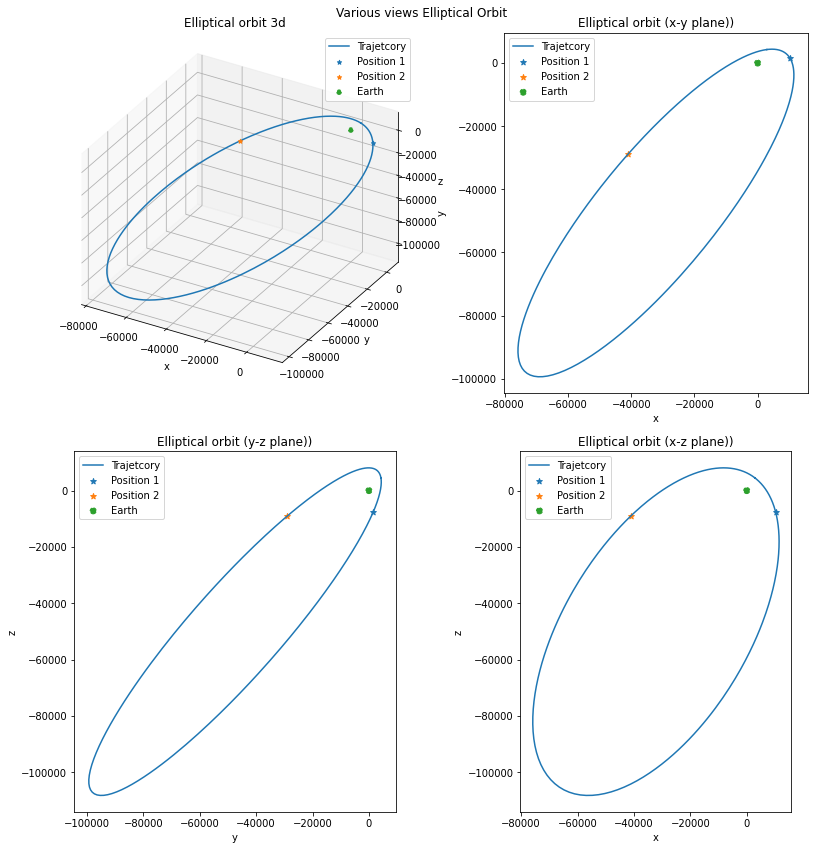

In [23]:
thst_traj = kp.angle.degree(np.linspace(0, 360, 500))
r_traj = kp.distance.keplar_r(p, e, thst_traj.rad, i=i.rad, omega=omega.rad, Omega=Omega.rad)

fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.set_proj_type('ortho')
ax1.plot(r_traj.eci[:,0], r_traj.eci[:,1], r_traj.eci[:,2], label='Trajetcory')
ax1.scatter(r1.eci[0], r1.eci[1], r1.eci[2], label='Position 1', marker='*')
ax1.scatter(r2.eci[0], r2.eci[1], r2.eci[2], label='Position 2', marker='*')
ax1.scatter(0, 0, 0, ls = '--', label='Earth')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Elliptical orbit 3d')
ax1.legend()

ax2.plot(r_traj.eci[:,0], r_traj.eci[:,1], label='Trajetcory')
ax2.scatter(r1.eci[0], r1.eci[1], label='Position 1', marker='*')
ax2.scatter(r2.eci[0], r2.eci[1], label='Position 2', marker='*')
ax2.scatter(0, 0, ls = '--', label='Earth')
ax2.set_aspect('equal', 'box')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Elliptical orbit (x-y plane))')
ax2.legend()

ax3.plot(r_traj.eci[:,1], r_traj.eci[:,2], label='Trajetcory')
ax3.scatter(r1.eci[1], r1.eci[2], label='Position 1', marker='*')
ax3.scatter(r2.eci[1], r2.eci[2], label='Position 2', marker='*')
ax3.scatter(0, 0, ls = '--', label='Earth')
ax3.set_aspect('equal', 'box')
ax3.set_xlabel('y')
ax3.set_ylabel('z')
ax3.set_title('Elliptical orbit (y-z plane))')
ax3.legend()

ax4.plot(r_traj.eci[:,0], r_traj.eci[:,2], label='Trajetcory')
ax4.scatter(r1.eci[0], r1.eci[2], label='Position 1', marker='*')
ax4.scatter(r2.eci[0], r2.eci[2], label='Position 2', marker='*')
ax4.scatter(0, 0, ls = '--', label='Earth')
ax4.set_aspect('equal', 'box')
ax4.set_xlabel('x')
ax4.set_ylabel('z')
ax4.set_title('Elliptical orbit (x-z plane))')
ax4.legend()

fig.suptitle('Various views Elliptical Orbit')
fig.tight_layout()
fig.subplots_adjust(top=0.95)